<a href="https://colab.research.google.com/github/angwelo/ASSIGNMENT-/blob/main/Human_Resource_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES

In [28]:
from google.colab import files
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

LOAD THE DATASET


In [39]:
files.upload_file= files.upload()

zip_filename= "archive (3).zip"
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
  zip_ref.extractall("dataset")

Saving archive (3).zip to archive (3) (2).zip


In [40]:
# STEP 3: Check what files were extracted
print("Extracted files:", os.listdir("dataset"))

Extracted files: ['HRDataset_v14.csv']


In [41]:

# STEP 4: Load the CSV into a DataFrame
csv_path = "dataset/HRDataset_v14.csv"
df = pd.read_csv(csv_path)

# STEP 5: Preview the data
df.head()

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [42]:
#check the shape of the dataset
rows,columns=df.shape
print(f"The dataset has {rows} rows and {columns} columns")

The dataset has 311 rows and 36 columns


In [43]:
#display columns and their datatypes
df.dtypes
print(df.dtypes)

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [44]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [47]:
#find the number of unique value
unique_values=df.nunique()
print(unique_values)

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [48]:
#check for missing values
missing_values=df.isnull().sum()
print(missing_values)

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [50]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include='number')
print(numerical_cols)


     EmpID  MarriedID  MaritalStatusID  GenderID  EmpStatusID  DeptID  \
0    10026          0                0         1            1       5   
1    10084          1                1         1            5       3   
2    10196          1                1         0            5       5   
3    10088          1                1         0            1       5   
4    10069          0                2         0            5       5   
..     ...        ...              ...       ...          ...     ...   
306  10135          0                0         1            1       5   
307  10301          0                0         0            5       5   
308  10010          0                0         0            1       3   
309  10043          0                0         0            1       3   
310  10271          0                4         0            1       5   

     PerfScoreID  FromDiversityJobFairID  Salary  Termd  PositionID   Zip  \
0              4                       0   625

In [55]:
# Describe numerical columns - mean, median, std
summary = numerical_cols.describe()   # by default, only numeric columns
print(summary)

ValueError: No axis named 1 for object type Series

In [56]:
numerical_cols = df.select_dtypes(include='number')
summary = numerical_cols.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])
print(summary)


ValueError: No axis named 1 for object type Series

In [57]:
# find the distribution of employee salaries
salary_summary = df['Salary'].describe()
print(salary_summary)


count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64


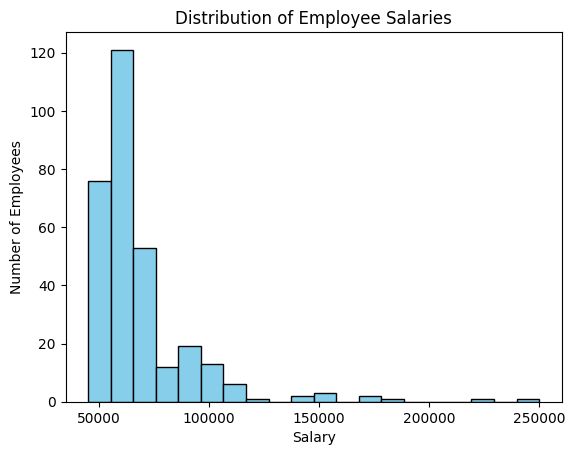

In [58]:
#plot a histogram to show distribution, using 20 bins to create 20 intervals
plt.hist(df['Salary'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

In [59]:
 #Convert DOB to datetime, coerce errors
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
print(df['DOB'].head())

0   1983-07-10
1   1975-05-05
2   1988-09-19
3   1988-09-27
4   1989-09-08
Name: DOB, dtype: datetime64[ns]


/tmp/ipython-input-2673994184.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')


In [60]:
#finding the average age of employees
today=pd.to_datetime('today')
df['Age']=(today-df['DOB']).dt.days//365
average_age=df['Age'].mean()
print(f"The average age of employees is {average_age:.2f} years")
print(df['Age'].head())

The average age of employees is 16.84 years
0    42
1    50
2    36
3    36
4    36
Name: Age, dtype: int64


In [61]:
#check for unique values in the employment status
employment_status_count= df['EmploymentStatus'].value_counts()
print(employment_status_count)

EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64


In [62]:
plt.figure(figsize=(10,6))  # Adjust the figure size
sns.countplot(df, x='Department', order=df['Department'].value_counts().index, palette='viridis') # pallete = color
plt.title('Number of Employees per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

<Figure size 1000x600 with 0 Axes>

In [63]:
average_salary_by_department=df.groupby('Department')['Salary'].mean().reset_index() #reset index returns the values as a clean data frame.
print(average_salary_by_department)

             Department         Salary
0         Admin Offices   71791.888889
1      Executive Office  250000.000000
2                 IT/IS   97064.640000
3     Production          59953.545455
4                 Sales   69061.258065
5  Software Engineering   94989.454545


In [64]:
#find the distribution of the employment status
employment_status_count= df['EmploymentStatus'].value_counts(normalize=True)*100
print(employment_status_count)

EmploymentStatus
Active                    66.559486
Voluntarily Terminated    28.295820
Terminated for Cause       5.144695
Name: proportion, dtype: float64


In [65]:
#plot the distribution of employment status
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='EmploymentStatus', palette='viridis')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Employees')
plt.show()

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

<Figure size 1000x600 with 0 Axes>

In [66]:
#Compare salary levels between Male and Female employees.
average_salary_by_gender=df.groupby('Sex')['Salary'].mean().reset_index()
print(average_salary_by_gender)


  Sex        Salary
0   F  67786.727273
1  M   70629.400000


In [67]:
#visualizations using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Gender', y='Salary', palette='Set2')

plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

<Figure size 800x600 with 0 Axes>

In [68]:
#which recruitment resource brings in the most employees
resource_counts=df['RecruitmentSource'].value_counts()
print(resource_counts)

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64


In [69]:
count_diversity = (df['RecruitmentSource'] == 'Diversity Job Fair').sum()
print("Employees from Diversity Job Fair:", count_diversity)


Employees from Diversity Job Fair: 29


In [70]:
#as a percentage
percentage_diversity = (count_diversity / len(df)) * 100
print("Percentage of Employees from Diversity Job Fair:", percentage_diversity)

Percentage of Employees from Diversity Job Fair: 9.32475884244373


In [71]:
#can also use the mean to calculate percentage
percentage = (df['RecruitmentSource'] == 'Diversity Job Fair').mean() * 100
print(f"Percentage of employees recruited via Diversity Job Fair: {percentage:.2f}%")


Percentage of employees recruited via Diversity Job Fair: 9.32%


In [72]:
#Compare engagement survey scores across different departments.
average_engagement_by_department=df.groupby('Department')['EngagementSurvey'].mean().reset_index()
print(average_engagement_by_department)

             Department  EngagementSurvey
0         Admin Offices          4.393333
1      Executive Office          4.830000
2                 IT/IS          4.154000
3     Production                 4.129569
4                 Sales          3.818710
5  Software Engineering          4.061818


In [73]:
#finding the highest salary by race
highest_salary_by_race=df.groupby('RaceDesc')['Salary'].max().reset_index()
print(highest_salary_by_race)

                           RaceDesc  Salary
0  American Indian or Alaska Native   70545
1                             Asian  107226
2         Black or African American  178000
3                          Hispanic   83667
4                 Two or more races   71707
5                             White  250000


In [74]:
#finding the correlation between special project count and salary
corr = df['SpecialProjectsCount'].corr(df['Salary'])
print(f"Correlation between number of projects and salary: {corr:.2f}")


Correlation between number of projects and salary: 0.51


In [75]:
#Do married employees earn more on average than single employees?
avg_salary_marital = df.groupby('MaritalDesc')['Salary'].mean().reset_index()
print(avg_salary_marital)


  MaritalDesc        Salary
0    Divorced  64427.333333
1     Married  69827.717742
2   Separated  62934.333333
3      Single  70052.576642
4     Widowed  65195.125000


In [76]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='MaritalDesc', y='Salary', estimator='mean', palette='Set2')

plt.title('Average Salary by Marital Status')
plt.ylabel('Average Salary')
plt.xlabel('Marital Status')
plt.show()

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

<Figure size 600x500 with 0 Axes>

In [77]:
#finding the manager with the largest teams
team_sizes = df.groupby('ManagerName')['EmpID'].count().sort_values(ascending=False)
print(team_sizes.head(10))  # top 10 managers


ManagerName
Brannon Miller    22
Kelley Spirea     22
Kissy Sullivan    22
Michael Albert    22
Elijiah Gray      22
Ketsia Liebig     21
David Stanley     21
Webster Butler    21
Amy Dunn          21
Janet King        19
Name: EmpID, dtype: int64


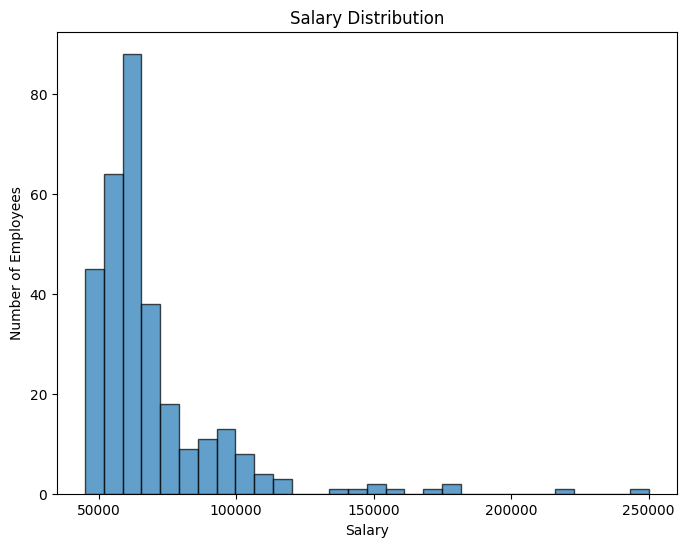

In [78]:
#Plot the salary distribution using histograms.
plt.figure(figsize=(8,6))
plt.hist(df['Salary'], bins=30, edgecolor='black', alpha=0.7)

plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

In [79]:
#Show the count of employees by department
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Department', palette='Set3')

plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Count of Employees')
plt.xticks(rotation=45)  # rotates labels if names are long
plt.show()

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

<Figure size 1000x600 with 0 Axes>

In [80]:
#compare the average satisfaction by department
average_satisfaction = df.groupby('Department')['EmpSatisfaction'].mean().sort_values(ascending=False)
print(average_satisfaction)


Department
Software Engineering    4.090909
Sales                   4.032258
IT/IS                   3.960000
Production              3.861244
Admin Offices           3.555556
Executive Office        3.000000
Name: EmpSatisfaction, dtype: float64


In [81]:
terminated_df = df[df['EmploymentStatus'].str.contains('Terminated', case=False, na=False)]
print(terminated_df)

                Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
4            Anderson, Carol   10069          0                2         0   
10       Baczenski, Rachael    10252          1                1         0   
11            Barbara, Thomas  10242          1                1         1   
..                        ...    ...        ...              ...       ...   
301             Wilber, Barry  10048          1                1         1   
302             Wilkes, Annie  10204          0                2         0   
303     Williams, Jacquelyn    10264          0                0         0   
304        Winthrop, Jordan    10033          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  

In [82]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], errors='coerce')

In [83]:
#count termination by month and plot

terminations_over_time = terminated_df['DateofTermination'].dt.to_period('M').value_counts().sort_index()

terminations_over_time.plot(kind='line', figsize=(10,6), marker='o')

plt.title('Employee Terminations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Terminations')
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [84]:
#plot the average salary by gender using boxplots
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Gender', y='Salary', palette='Set2')

plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

<Figure size 800x600 with 0 Axes>

In [85]:
#Visualize performance scores vs salary.
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PerformanceScore', y='Salary', hue='PerformanceScore', palette='viridis', s=80)

plt.title('Performance Scores vs Salary')
plt.xlabel('Performance Score')
plt.ylabel('Salary')
plt.legend(title='Performance Score')
plt.show()


TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

<Figure size 800x600 with 0 Axes>

In [86]:
#Create a heatmap of correlations between numeric variables.
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Variables', fontsize=14)
plt.show()


TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

<Figure size 1000x800 with 0 Axes>

In [87]:
#Plot engagement survey score vs satisfaction score.
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='EngagementSurvey',
    y='EmpSatisfaction',
    hue='EmpSatisfaction',
    palette='coolwarm',
    s=80
)

plt.title('Engagement Survey Score vs Satisfaction Score', fontsize=14)
plt.xlabel('Engagement Survey Score')
plt.ylabel('Employee Satisfaction Score')
plt.show()

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

<Figure size 800x600 with 0 Axes>

In [88]:
#Show a stacked bar chart of employee status across departments.
# Create a crosstab (counts of Status by Department)
status_dept = pd.crosstab(df['Department'], df['EmploymentStatus'])

# Plot as stacked bar chart
status_dept.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')

plt.title('Employee Status Across Departments', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TypeError: 'Series' object is not callable

In [89]:
#Plot absenteeism (Absences) distribution among employees.
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Absences', bins=20, kde=True, color='skyblue')

plt.title('Distribution of Employee Absenteeism', fontsize=14)
plt.xlabel('Number of Absences')
plt.ylabel('Count of Employees')
plt.show()

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

<Figure size 800x600 with 0 Axes>

PCA

Standardize numerical features before applying PCA.

In [90]:
# Select only numerical features
numeric_df = df.select_dtypes(include=['number'])

# Standardize numerical features (mean=0, variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply PCA
pca = PCA(n_components=2)   # Example: reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Put into DataFrame for easier use
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print("Explained variance ratio:", pca.explained_variance_ratio_)
pca_df.head()

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

In [91]:
#Plot the explained variance ratio for the PCA components.
# Apply PCA on scaled data (keep all components)
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', linestyle='--')
plt.title('Explained Variance Ratio per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_var)+1))
plt.show()

# Optional: cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker='o', color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(explained_var)+1))
plt.show()

NameError: name 'scaled_data' is not defined

In [92]:

# 1. Select numeric columns
numeric_df = df.select_dtypes(include=['number']).fillna(0)

# 2. Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# 3. Apply PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# 4. Create DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Department'] = df['Department']   # add back department info

# 5. Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Department',
    palette='tab10',
    alpha=0.7
)

plt.title('PCA: Employees Colored by Department')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

In [93]:
#Which variables contribute most to the first principal component
#Get PCA loadings (components)
loadings = pca.components_[0]   # first principal component

# Create a DataFrame of feature contributions
pc1_contrib = pd.DataFrame({
    'Feature': numeric_df.columns,
    'Contribution': loadings
})

# Sort by absolute contribution
pc1_contrib['AbsContribution'] = pc1_contrib['Contribution'].abs()
pc1_contrib = pc1_contrib.sort_values(by='AbsContribution', ascending=False)

print("Top contributors to the first principal component (PC1):")
print(pc1_contrib.head(10))

AttributeError: 'PCA' object has no attribute 'components_'

In [ ]:
#Apply PCA to engagement + satisfaction + absences. Do these condense into 1 dimension?
# 1. Select relevant features
features = ['EngagementSurvey', 'EmpSatisfaction', 'Absences']
X = df[features].dropna()   # drop rows with missing values

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA
pca = PCA()
pca.fit(X_scaled)

# 4. Explained variance
explained_var = pca.explained_variance_ratio_

# Show results
for i, var in enumerate(explained_var, 1):
    print(f"PC{i}: {var:.2%}")

# Plot explained variance
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title("Explained Variance Ratio (Engagement + Satisfaction + Absences)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()


In [95]:
#Visualize employees in PCA-reduced 2D space grouped by PerformanceScore.
# 1. Select numeric features only (drop non-numeric)
numeric_df = df.select_dtypes(include=['number']).dropna()

# 2. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# 3. PCA reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# 4. Add results to dataframe
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['PerformanceScore'] = df.loc[numeric_df.index, 'PerformanceScore'].values

# 5. Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='PerformanceScore',
    palette='Set2',
    alpha=0.7
)

plt.title('Employees in PCA-Reduced 2D Space (Grouped by Performance Score)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.legend(title='Performance Score')
plt.show()

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

In [94]:
#Compare clustering before and after PCA using k-means on numeric data.
# 1. Select numeric features
numeric_df = df.select_dtypes(include=['number']).dropna()

# 2. Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# 3. K-Means on raw data (use 3 clusters for example)
kmeans_raw = KMeans(n_clusters=3, random_state=42)
clusters_raw = kmeans_raw.fit_predict(scaled_data)

# 4. PCA reduction (2D for visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 5. K-Means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)

# 6. Plot results
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Raw clustering projected onto PCA space
sns.scatterplot(
    x=pca_data[:,0], y=pca_data[:,1],
    hue=clusters_raw, palette="Set1", ax=axes[0], alpha=0.7
)
axes[0].set_title("K-Means Clusters (Raw Numeric Data in PCA space)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Clustering on PCA-reduced data
sns.scatterplot(
    x=pca_data[:,0], y=pca_data[:,1],
    hue=clusters_pca, palette="Set2", ax=axes[1], alpha=0.7
)
axes[1].set_title("K-Means Clusters (After PCA)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.tight_layout()
plt.show()

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

In [ ]:
#Plot loadings of salary, absences, and engagement on the first 2 PCs.
# Select only the variables of interest
features = ["Salary", "Absences", "EngagementSurvey"]
X = df[features].dropna()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Get loadings (coefficients)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Put into DataFrame for plotting
loading_df = pd.DataFrame(loadings, columns=["PC1", "PC2"], index=features)

# Plot loadings
plt.figure(figsize=(6,6))
sns.scatterplot(x="PC1", y="PC2", data=loading_df, s=100)

# Add text labels
for feature, row in loading_df.iterrows():
    plt.text(row["PC1"]*1.05, row["PC2"]*1.05, feature, fontsize=12)

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.title("Loadings of Salary, Absences, Engagement on First 2 PCs")
plt.xlabel("PC1 Loadings")
plt.ylabel("PC2 Loadings")
plt.show()